In [61]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import requests,zipfile, io
import seaborn as sns

In [62]:
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data'
res = requests.get(url).content

abalone = pd.read_csv(io.StringIO(res.decode('utf-8')), header=None)

In [66]:
abalone.columns = ['sex', 'tall', 'Diameter', 'height', 'Whole', 'Shucked', 'Viscera', 'Shell', 'ring_cnt']

In [67]:
abalone

,sex,tall,Diameter,height,Whole,Shucked,Viscera,Shell,ring_cnt
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


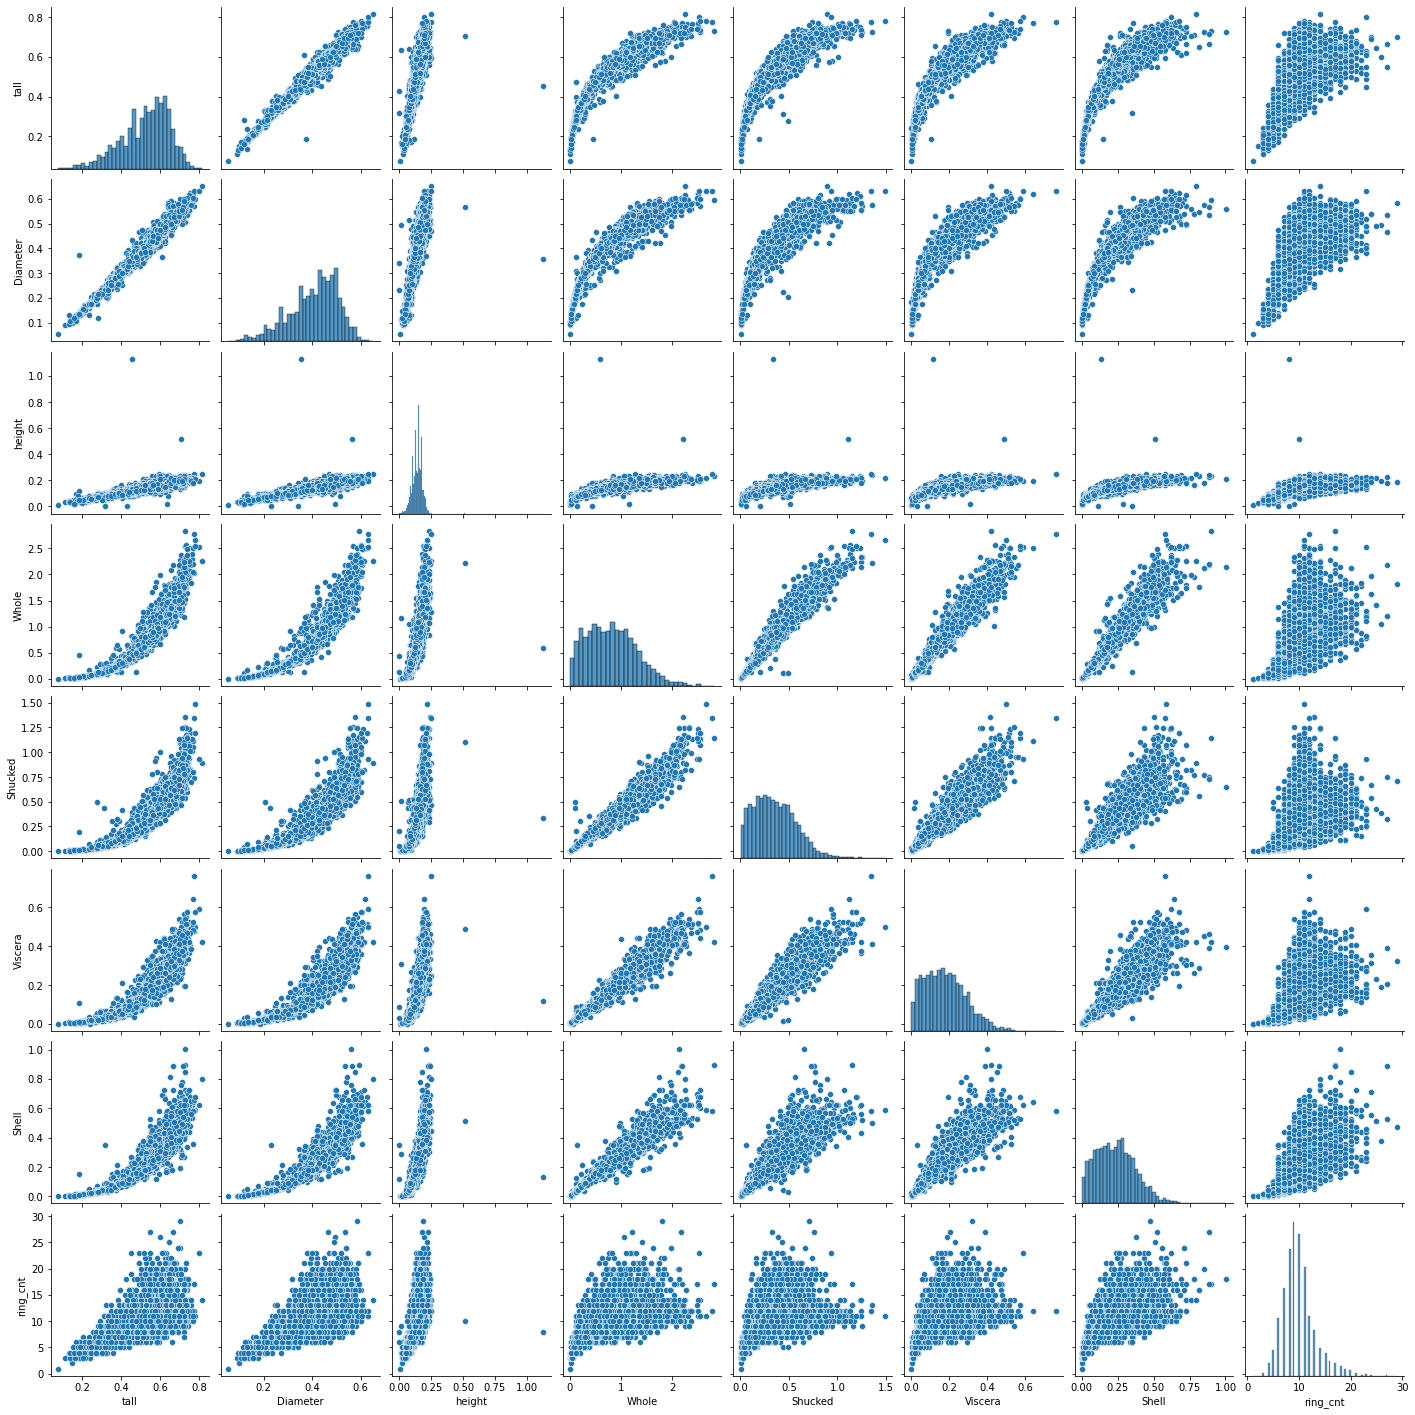

In [68]:
sns.pairplot(abalone)

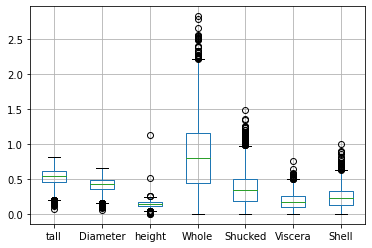

In [70]:
abalone[['sex', 'tall', 'Diameter', 'height', 'Whole', 'Shucked', 'Viscera', 'Shell']].boxplot()
plt.grid(True)

In [73]:
abalone.groupby('sex')['sex'].count()
abalone['sex'] = abalone['sex'].map(lambda x : 0 if x =='F' else (1 if x =='I' else (2 if x == 'M' else 5)))

In [87]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
import xgboost as Xgb
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor

X = abalone.drop('ring_cnt', axis=1)
Y = abalone['ring_cnt']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,test_size=0.5, random_state=12)

In [88]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [89]:
for model in [LinearRegression(), DecisionTreeRegressor(), KNeighborsRegressor(n_neighbors=30), RandomForestRegressor(), Xgb.XGBRegressor()]:
    fit_model = model.fit(X_train_std, Y_train)
    
    print('Train : ', fit_model.__class__.__name__, fit_model.score(X_train_std, Y_train))
    print('Test : ', fit_model.__class__.__name__, fit_model.score(X_test_std, Y_test))
    print('===============================================================')

Train :  LinearRegression 0.5178599731527437
Test :  LinearRegression 0.534171488199306
Train :  DecisionTreeRegressor 1.0
Test :  DecisionTreeRegressor 0.10451634136462506
Train :  KNeighborsRegressor 0.5110576721172151
Test :  KNeighborsRegressor 0.5163702297602824
Train :  RandomForestRegressor 0.9316651640089952
Test :  RandomForestRegressor 0.5652838775566441
Train :  XGBRegressor 0.9696768071835259
Test :  XGBRegressor 0.5153878427588032


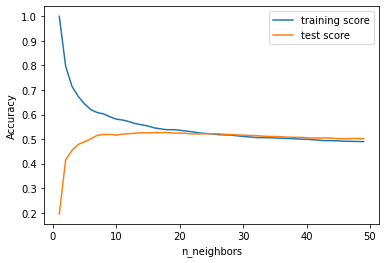

In [90]:
training_accuracy = []
test_accuracy = []

neighbors_settings = range(1, 50)

for n_neighbors in neighbors_settings:
    clf = KNeighborsRegressor(n_neighbors=n_neighbors)
    clf.fit(X_train_std, Y_train)
    
    training_accuracy.append(clf.score(X_train_std, Y_train))
    test_accuracy.append(clf.score(X_test_std, Y_test))
    
plt.plot(neighbors_settings, training_accuracy, label='training score')
plt.plot(neighbors_settings, test_accuracy, label='test score')
plt.ylabel('Accuracy')
plt.xlabel('n_neighbors')
plt.legend()